### Constraint-based Chain-of-States methods for ethylene Diels-Alder reaction

**Authors: Zilin Song**

#### a. Imports

In [1]:
# Generic Python.
import sys
sys.dont_write_bytecode = True
from typing import Type, List

# Misc.
import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as plt_ticker
from matplotlib.axes import Axes
import seaborn as sns

#### b. Calculations

calculations are at ./ms0_car/fig_pyscf/car_paths/rxn9

In [2]:
basedir = "./ms0_car/fig_pyscf/car_paths/rxn9"

def load_cvec(which_path: str):
    """Load the chain vector, which_path = 'cimg' or 'mini'. """
    if not which_path in ['cimg', 'mini']:
        raise ValueError('wrong which_path spec. ')
    
    lines = open(f'{basedir}/{which_path}_finl.xyz', 'r').readlines()
    cvec = []
    for l in lines:
        if len(l.strip().split())== 4:
            axyz = l.strip().split()
            cvec.append(float(axyz[1]))
            cvec.append(float(axyz[2]))
            cvec.append(float(axyz[3]))
    cvec = numpy.asarray(cvec).reshape(7, -1)

    return cvec

def load_ener(which_path: str):
    """Load the energy vector, which_path = 'cimg' or 'mini'. """
    if not which_path in ['cimg', 'mini']:
        raise ValueError('wrong which_path spec. ')
    
    lines = open(f'{basedir}/{which_path}_ener.log', 'r').readlines()
    ener = []
    l = lines[-1].strip().split(':')[-1]
    for _ in range(7):
        ener.append(float(l.split()[_]))


    ener  = numpy.asarray(ener)
    ener -= numpy.min(ener)
    return ener

def load_traj():
    """Load the constraint convergence log. """
    lines = open(f'{basedir}/mini_cons.log', 'r').readlines()
    
    itr = []
    rms = []
    for l in lines:
        words = l.split()
        itr.append(int(words[1]))
        rms.append(float(words[2]))
    
    return itr, rms

#### c. mk plots.

[40.83834102 41.07901739 42.0308966  44.44390307 53.27295093 39.21819472
  0.        ] 
 [40.83834101 40.90235345 41.41871488 44.98051115 59.22522199 23.03249708
  0.        ]


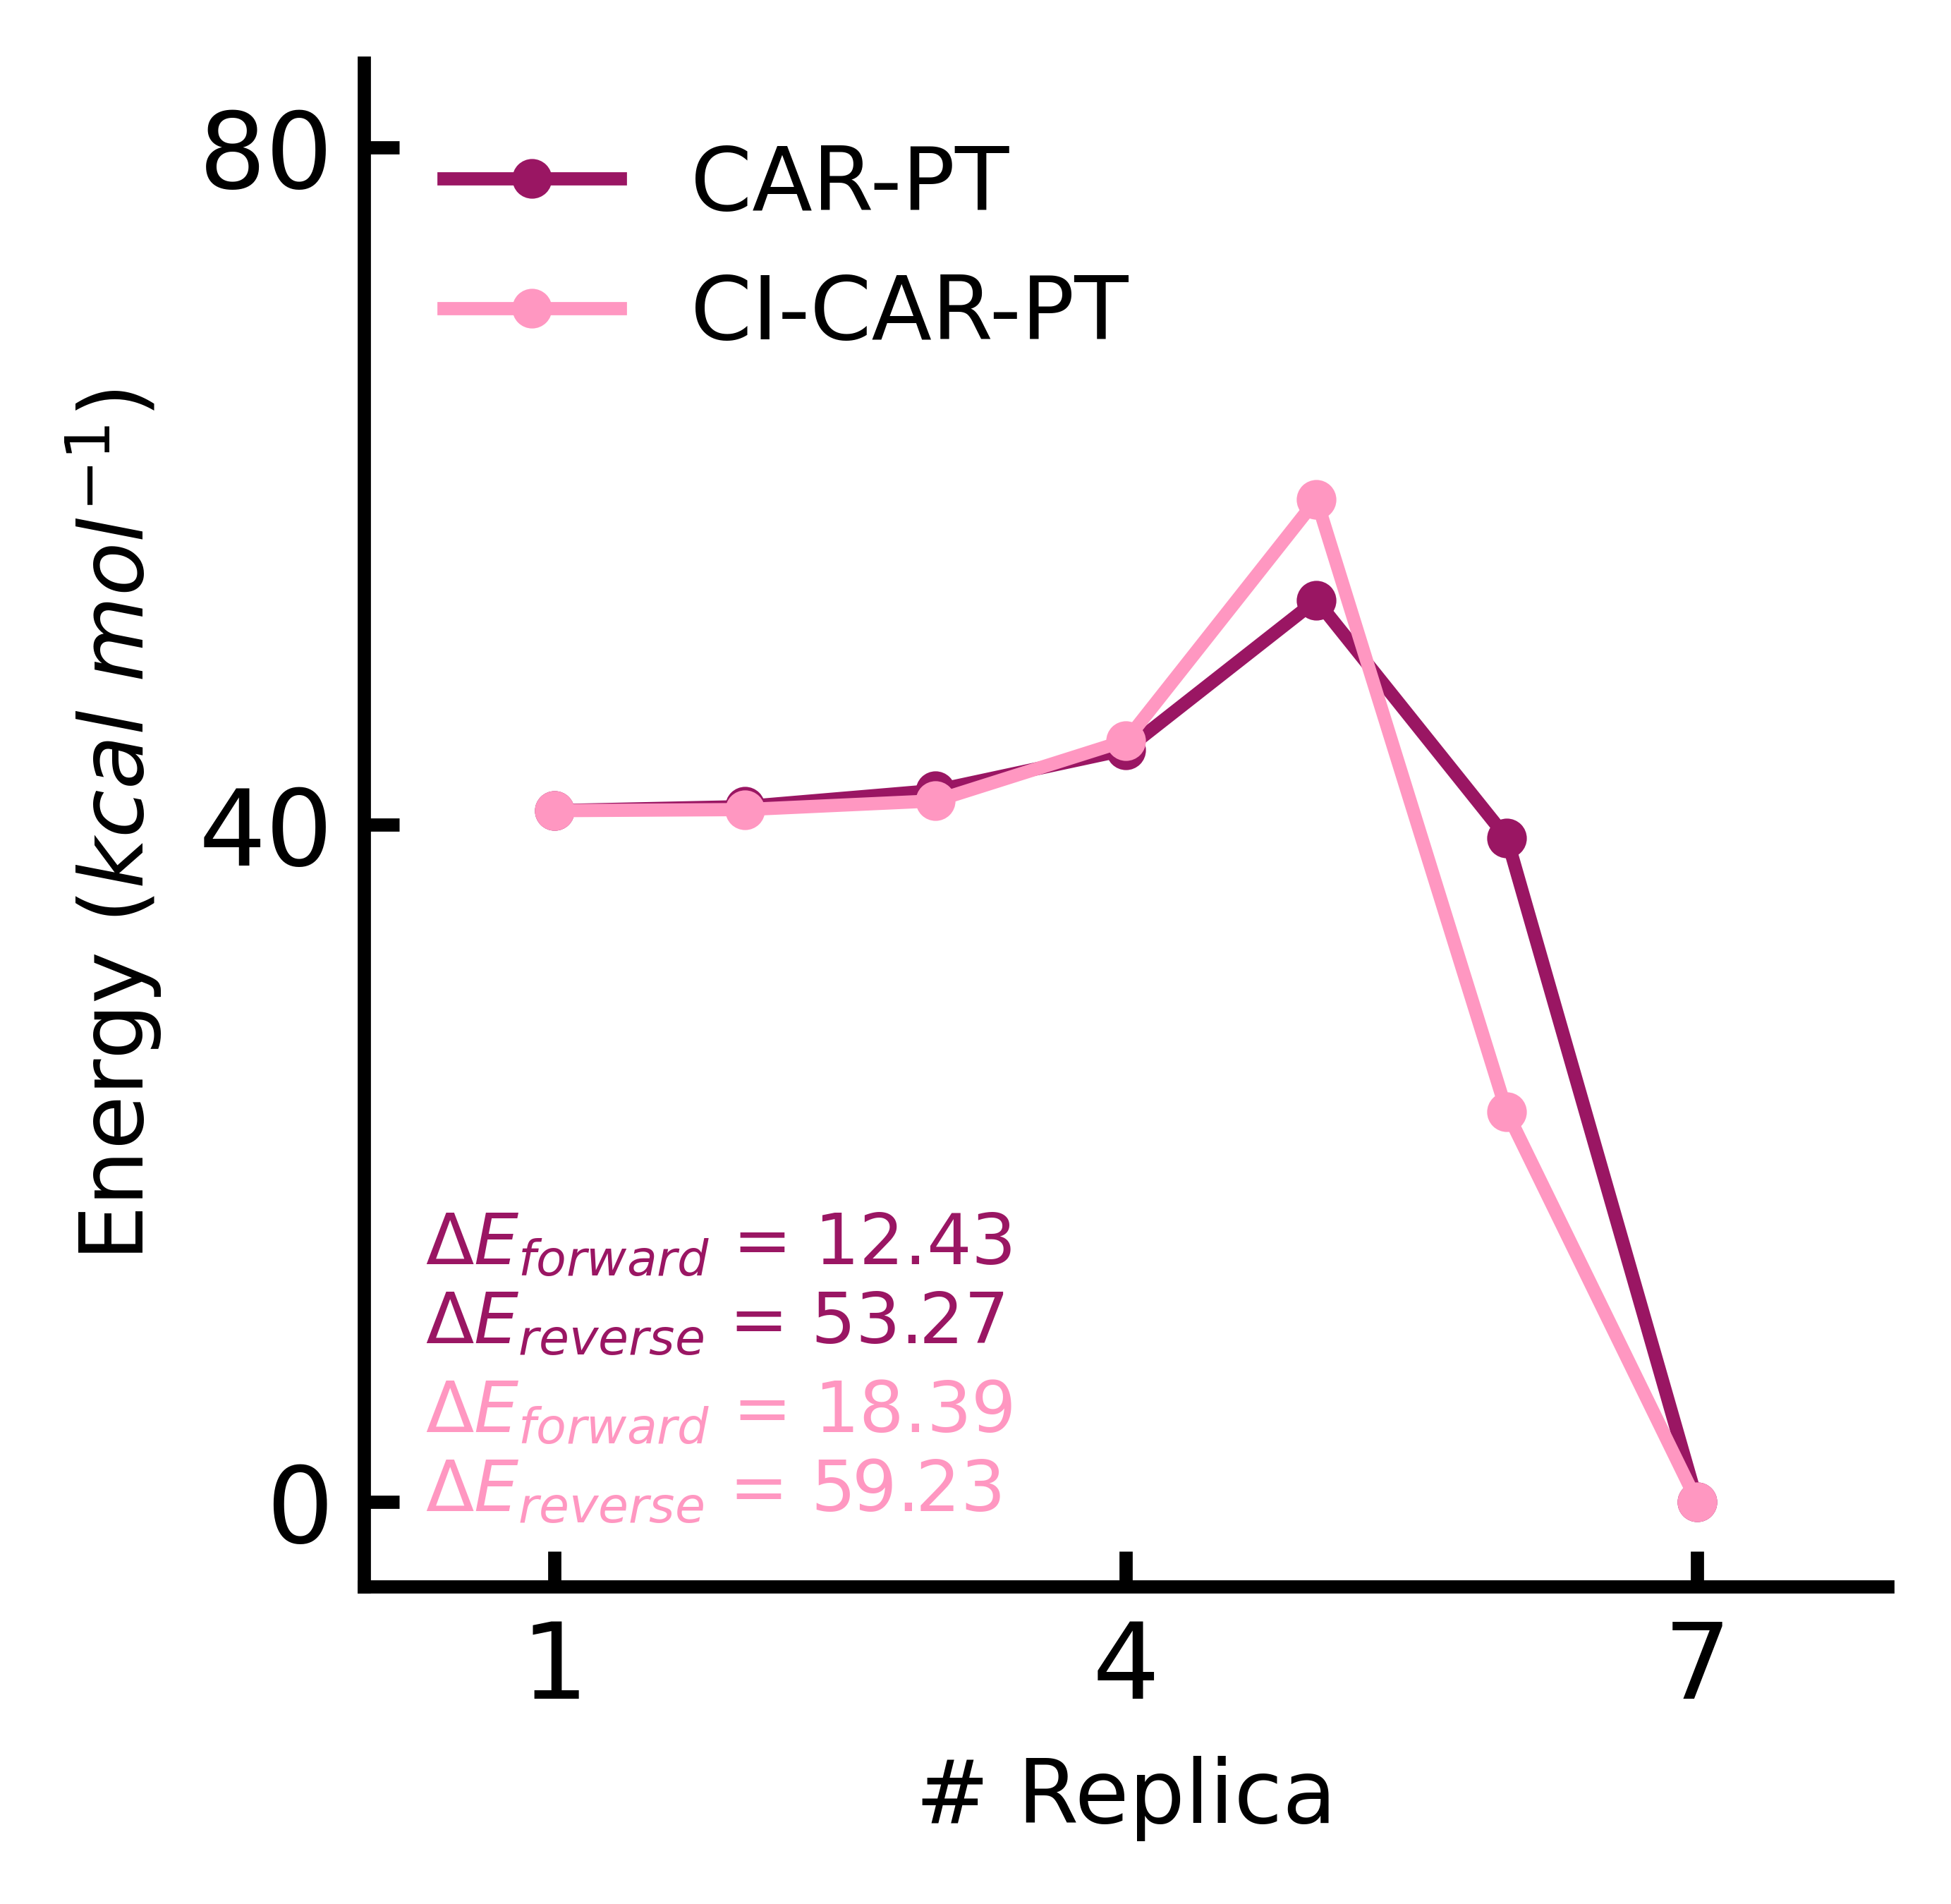

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=900)
plt.subplots_adjust(left=1./5., right=3.4/5., top=3.4/4., bottom=1./4.)

ener0 = load_ener('mini')
fwb_ener0 = numpy.max(ener0) - ener0[0]
bwb_ener0 = numpy.max(ener0)

ax.plot(numpy.arange(7)+1, ener0, lw=1.5, color="#9A1663", zorder=5, marker='.', markersize=7, label='CAR-PT')
ax.text(0.04, 0.15, r"$\Delta E_{forward}$ = "+f"{fwb_ener0:.2f}"+"\n"+r"$\Delta E_{reverse}$ = "+f"{bwb_ener0:.2f}", 
        c="#9A1663", ha='left', va='bottom', transform=ax.transAxes, fontsize=8)


ener1 = load_ener('cimg')
fwb_ener1 = numpy.max(ener1) - ener1[0]
bwb_ener1 = numpy.max(ener1)

ax.plot(numpy.arange(7)+1, ener1, lw=1.5, color="#FF97C1", zorder=5, marker='.', markersize=7, label='CI-CAR-PT')
ax.text(0.04, 0.04, r"$\Delta E_{forward}$ = "+f"{fwb_ener1:.2f}"+"\n"+r"$\Delta E_{reverse}$ = "+f"{bwb_ener1:.2f}", 
        c="#FF97C1", ha='left', va='bottom', transform=ax.transAxes, fontsize=8)

print(ener0, '\n', ener1)

ax.set( xlim=(0, 8),       xticks=[1, 4, 7], 
        ylim=(-5, 85), yticks=numpy.arange(0, 81, 40))

ax.set_xlabel(r"# Replica")
ax.set_ylabel(r"Energy ($kcal\ mol^{-1}$)")
ax.tick_params(direction='in', width=1.5, length=4, labelsize=12)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc="upper left", bbox_to_anchor=(0., 1.), frameon=False)


plt.savefig(f'{basedir}/../../plot_dielsaider_b3lyp_ener.jpeg')

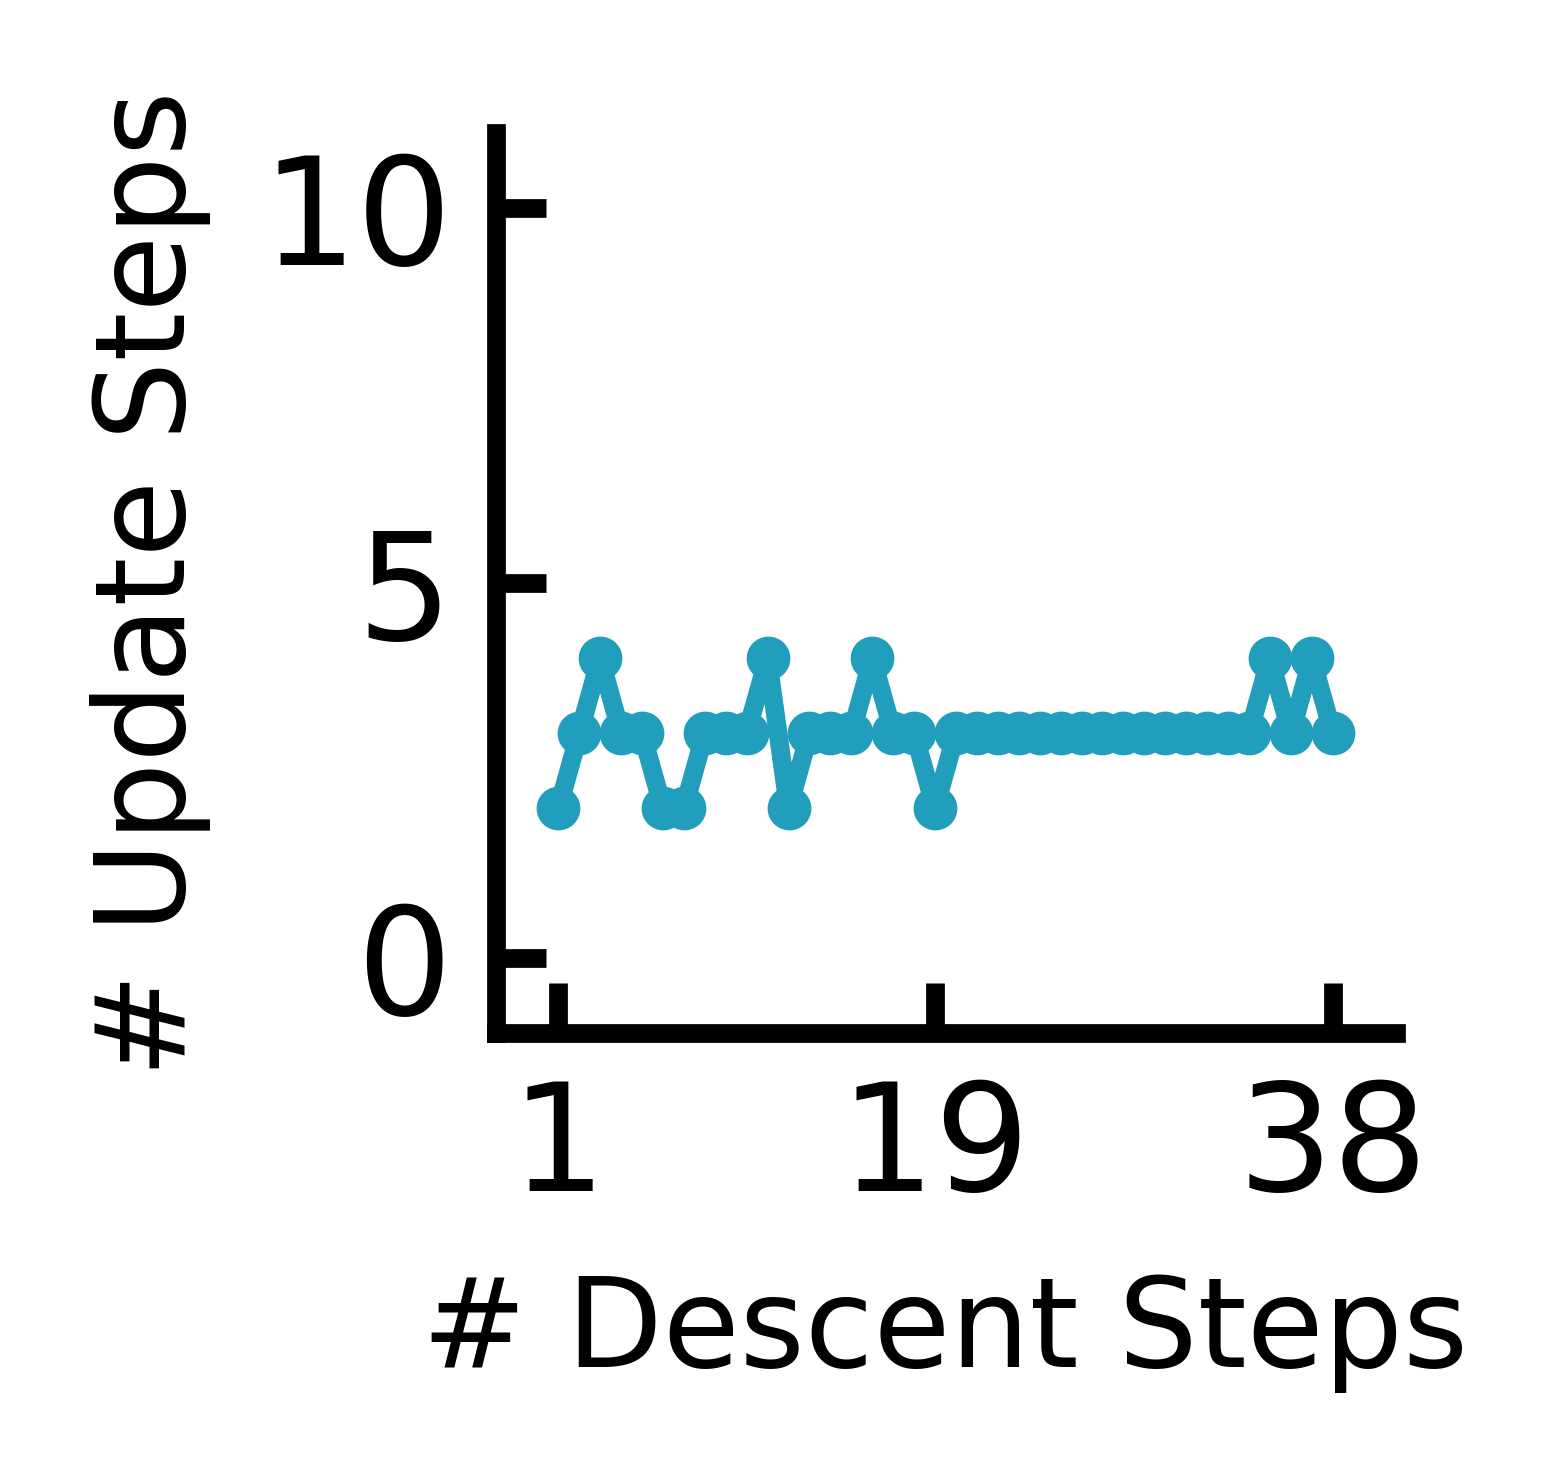

In [4]:
itr, rms = load_traj()

# Fig. iterative update counts
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=900)
plt.subplots_adjust(left=1./5., right=2./5., top=2./4., bottom=1./4.)


ax.tick_params(direction='in', width=1.5, length=4, labelsize=12)
ax.tick_params(axis='y')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(xlim=(-2, 41), xticks=[1, 19, 38],
       ylim=(-1, 11), yticks=[0, 5, 10])
ax.plot(numpy.arange(len(itr))+1, itr, color="#219EBC", label='CAR', marker='.', markersize=5, lw=1.5)
ax.set_ylabel('# Update Steps') 
ax.set_xlabel('# Descent Steps') 

# ax_rms = ax.twinx()
# ax_rms.tick_params(axis='y', labelcolor=sns.color_palette('colorblind')[1])
# ax_rms.spines['left'].set_linewidth(1.5)
# ax_rms.spines['right'].set_linewidth(1.5)
# ax_rms.spines['top'].set_linewidth(1.5)
# ax_rms.spines['bottom'].set_linewidth(1.5)
# ax_rms.tick_params(top=True, right=True, direction='in', width=1.5, length=4, labelsize=12)
# ax_rms.set(ylim=(1e-18, 1.), )
# ax_rms.set_yscale('log')
# ax_rms.plot([-100, 300], [1e-8,1e-8], 'gray',   ls='--',  lw=1.5, zorder=0)
# ax_rms.plot(numpy.arange(len(rms)), rms, color=sns.color_palette('colorblind')[1])
# ax_rms.set_ylabel(r'$\mathrm{\mid RMS_{i}-\overline{RMS}\mid_{MAX}}$ ($\AA$)', color=sns.color_palette('colorblind')[1]) 


plt.savefig(f'{basedir}/../../plot_dielsaider_b3lyp_itr_traj.jpeg')

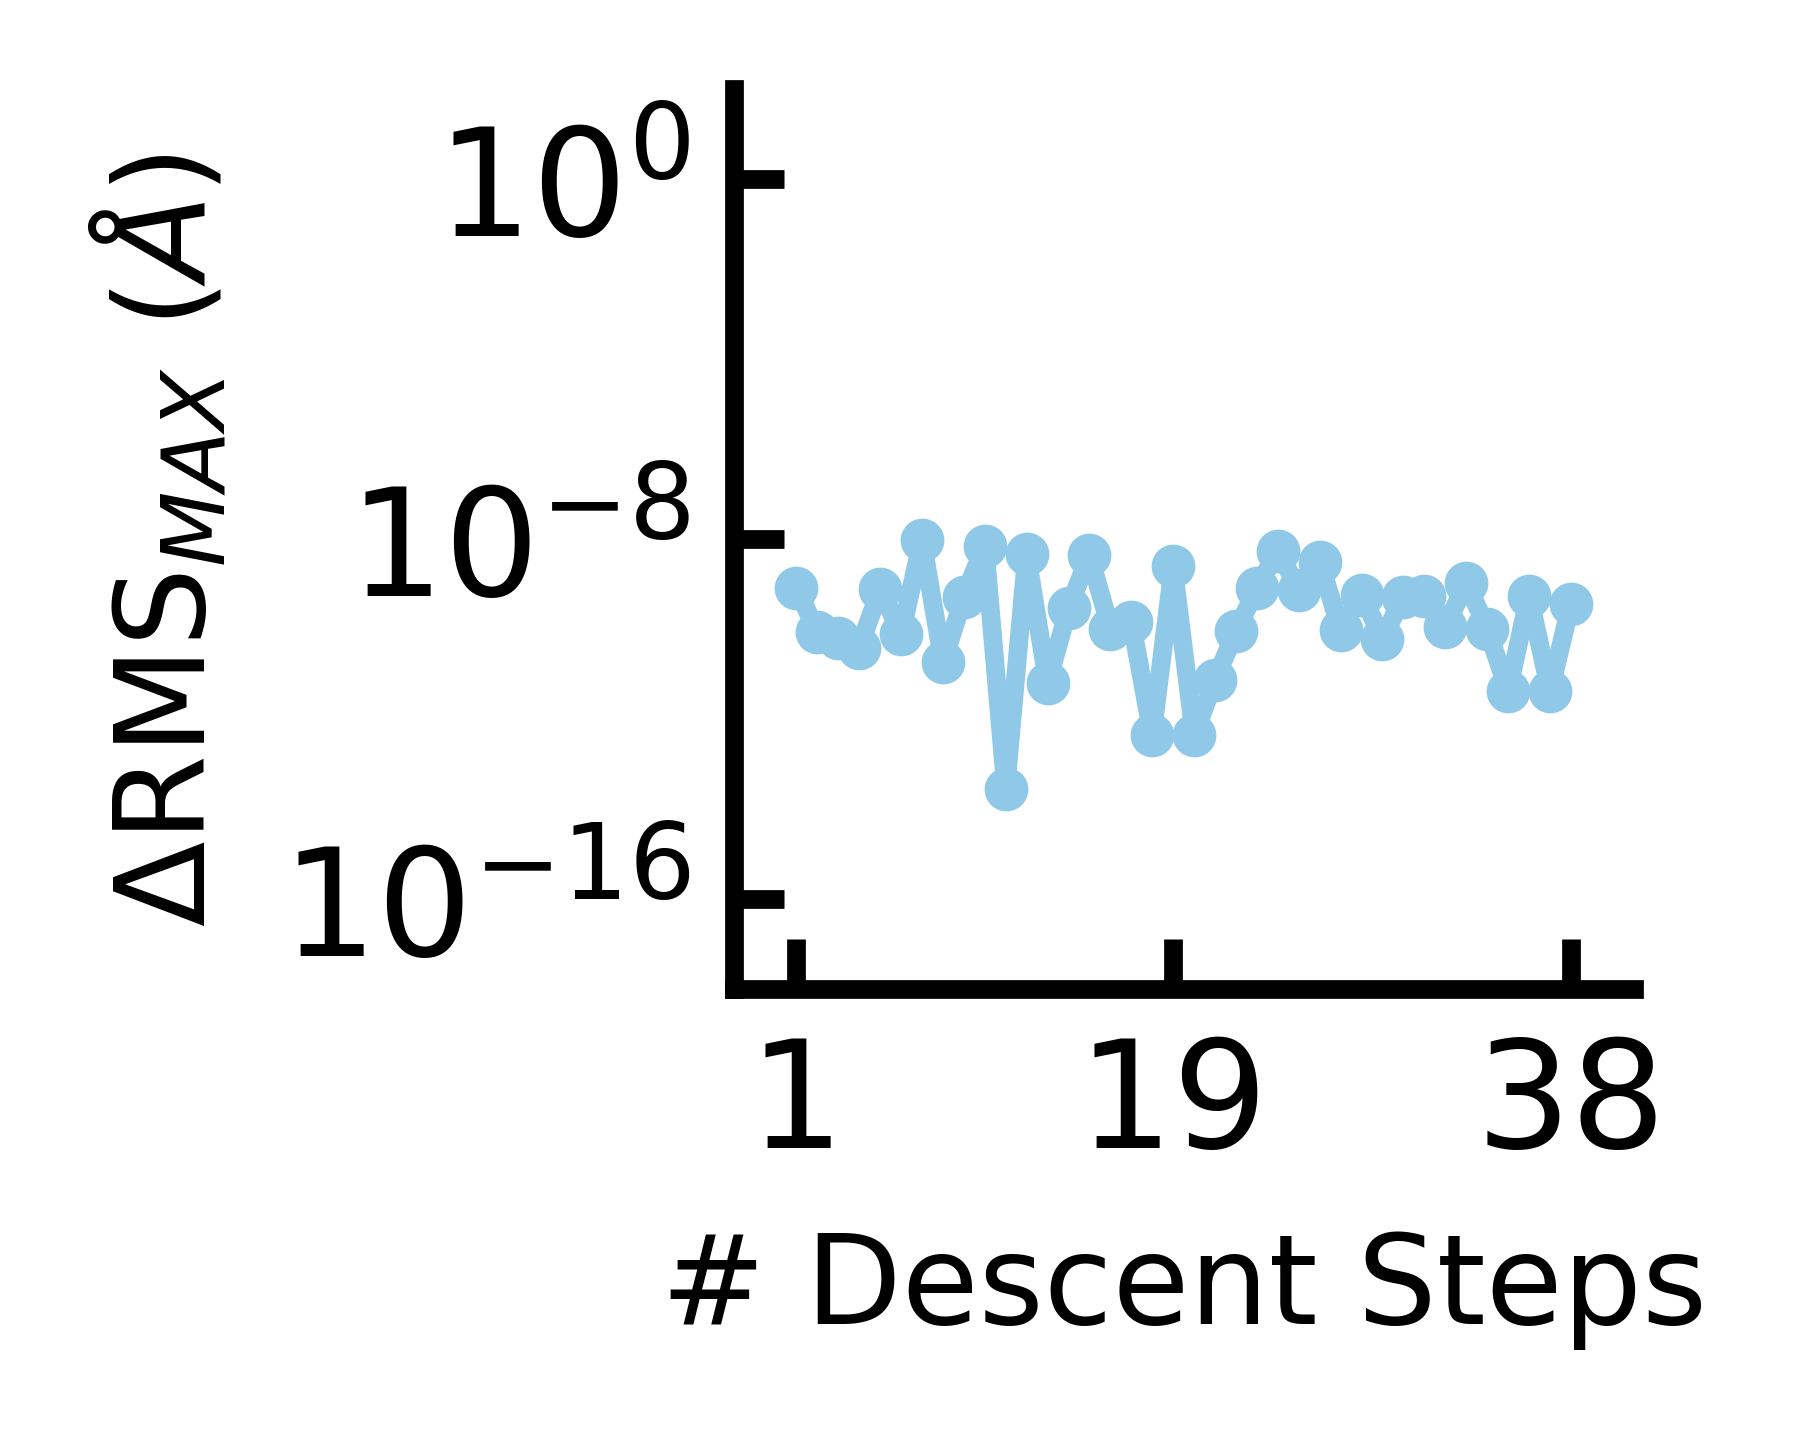

In [5]:
# Fig. iterative update counts
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=900)
plt.subplots_adjust(left=1./5., right=2./5., top=2./4., bottom=1./4.)


ax.tick_params(direction='in', width=1.5, length=4, labelsize=12)
ax.tick_params(axis='y')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(xlim=(-2, 41), xticks=[1, 19, 38],
       ylim=(1e-18, 100.), yscale='log', yticks=[1e-16, 1e-8, 1.], )
ax.plot(numpy.arange(len(itr))+1, rms, color="#90C9E7", label='CAR', marker='.', markersize=5, lw=1.5)
ax.set_ylabel(r'$\mathrm{\Delta RMS}_{MAX}}$ ($\AA$)') 
ax.set_xlabel('# Descent Steps') 

plt.savefig(f'{basedir}/../../plot_dielsaider_b3lyp_rms_traj.jpeg')